In [1]:
print("hello world, just because...")

hello world, just because...


In [2]:
#All relevant imports go here
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Defining arrays capable of storing position, velocity, mass, smoothing length, internal energy (u), pressure

class SPHParticles:
    def __init__(self, n):
        self.n = n
        self.position = np.zeros(n)
        self.velocity = np.zeros(n)
        self.mass = np.zeros(n)
        self.smoothing_length = np.zeros(n)
        self.internal_energy = np.zeros(n)
        self.pressure = np.zeros(n)

    def setup(self, xmin, xmax, rho_0):
        # Step 2: Setting up 1D array of n particles
        self.position = np.linspace(xmin, xmax, self.n)
        
        # Assigning mass to each particle based on initial density
        particle_spacing = (xmax - xmin) / (self.n - 1)
        self.mass = rho_0 * particle_spacing * np.ones(self.n)
        
        # Setting velocity to a sine wave in the x direction
        sound_speed = 343.0   #in m/s
        amplitude = 1e-4 * sound_speed
        self.velocity = amplitude * np.sin(2 * np.pi * self.position / (xmax - xmin))
        
        # Setting smoothing length initially to 1.2 times the particle spacing
        self.smoothing_length = 1.2 * particle_spacing * np.ones(self.n)
        
        for i in range(self.n):
            distance = np.abs(self.position - self.position[i])
            normalized_distance = distance / self.smoothing_length[i]
            q = np.where(normalized_distance < 2, 1 - normalized_distance / 2, 0)  # Truncated at 2h
            print(f"Particle {i + 1} - normalized_distance: {normalized_distance}, q value: {q[i]}")

        # Printing the setup information
        print("Setup Information:")
        print("Number of particles:", self.n)
        print("Particle spacing:", particle_spacing)
        print("Initial density (rho_0):", rho_0)
        print("Sound speed:", sound_speed)
        print("Amplitude of sine wave velocity:", amplitude)

    #Step 3: writing an output file
    def output(self, filename):
        data = np.column_stack((self.position, self.velocity, self.mass, self.smoothing_length, self.internal_energy, self.pressure))
        np.savetxt(filename, data, header="Position Velocity Mass Smoothing_Length Internal_Energy Pressure", comments='')
        

In [4]:
# Step 2: Calling the setup routine


n_particles = 100
particles = SPHParticles(n_particles)

xmin_value = 1.0
xmax_value = 2.0
rho_0_value = 1.0

particles.setup(xmin_value, xmax_value, rho_0_value)

Particle 1 - normalized_distance: [ 0.          0.83333333  1.66666667  2.5         3.33333333  4.16666667
  5.          5.83333333  6.66666667  7.5         8.33333333  9.16666667
 10.         10.83333333 11.66666667 12.5        13.33333333 14.16666667
 15.         15.83333333 16.66666667 17.5        18.33333333 19.16666667
 20.         20.83333333 21.66666667 22.5        23.33333333 24.16666667
 25.         25.83333333 26.66666667 27.5        28.33333333 29.16666667
 30.         30.83333333 31.66666667 32.5        33.33333333 34.16666667
 35.         35.83333333 36.66666667 37.5        38.33333333 39.16666667
 40.         40.83333333 41.66666667 42.5        43.33333333 44.16666667
 45.         45.83333333 46.66666667 47.5        48.33333333 49.16666667
 50.         50.83333333 51.66666667 52.5        53.33333333 54.16666667
 55.         55.83333333 56.66666667 57.5        58.33333333 59.16666667
 60.         60.83333333 61.66666667 62.5        63.33333333 64.16666667
 65.         65.8

In [5]:
# Step 3: Calling the output routine
output_filename = "particle_properties_new.txt"
particles.output(output_filename)



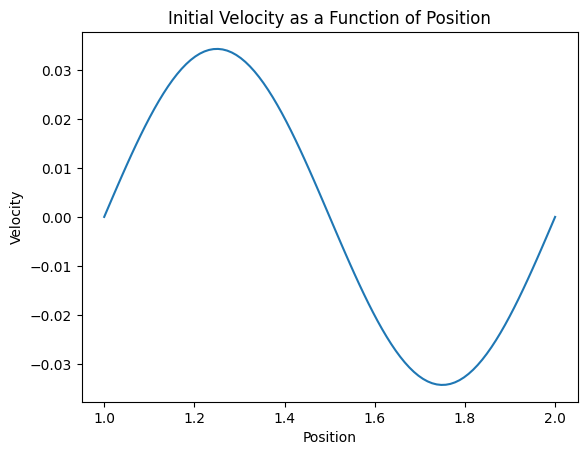

In [32]:
# Step 3: Plotting the initial velocity as a function of position
data = np.loadtxt(output_filename, skiprows=1)  # Skip the header
position = data[:, 0]
velocity = data[:, 1]

plt.plot(position, velocity, label='Initial Velocity')
plt.title('Initial Velocity as a Function of Position')
plt.xlabel('Position')
plt.ylabel('Velocity')
#plt.legend()
plt.show()

In [33]:
# step 4: separate module for densities 

def cubic_spline_kernel(q):
    """
    Cubic spline kernel and its gradient.
    """
    kernel_value = np.where(q < 1, (2 / 3) * (1 - 1.5 * q**2 + 0.75 * q**3), (1 / 6) * (2 - q)**3)
    kernel_gradient = np.where(q < 1, (-3 * q + 2.25 * q**2) / 3, -0.5 * (2 - q)**2)
    return kernel_value, kernel_gradient

def get_density(self):
    """
    Calculate the density using the SPH density estimate.
    """
    n_particles = len(positions)
    density = np.zeros(n_particles)

    for i in range(n_particles):
        for j in range(n_particles):
            q = np.abs(positions[i] - positions[j]) / smoothing_lengths[i]
            kernel_value, _ = cubic_spline_kernel(q)
            density[i] += masses[j] * kernel_value

    return density


In [ ]:
def output_to_file(filename, positions, velocities, masses, smoothing_lengths, internal_energy, pressure, density):
    """
    Write particle properties to a file.
    """
    data = np.column_stack((positions, velocities, masses, smoothing_lengths, internal_energy, pressure, density))
    header = "Position Velocity Mass Smoothing_Length Internal_Energy Pressure Density"
    np.savetxt(filename, data, header=header, comments='')

# Example usage in a separate script:
from sph_module import get_density, output_to_file

n_particles = 100
positions = np.linspace(0, 5, n_particles)
masses = np.ones(n_particles)
smoothing_lengths = np.ones(n_particles) * 1.2
density = get_density(positions, masses, smoothing_lengths)

# Example output to file:
output_to_file("particle_properties_with_density.txt", positions, velocities, masses, smoothing_lengths, internal_energy, pressure, density)